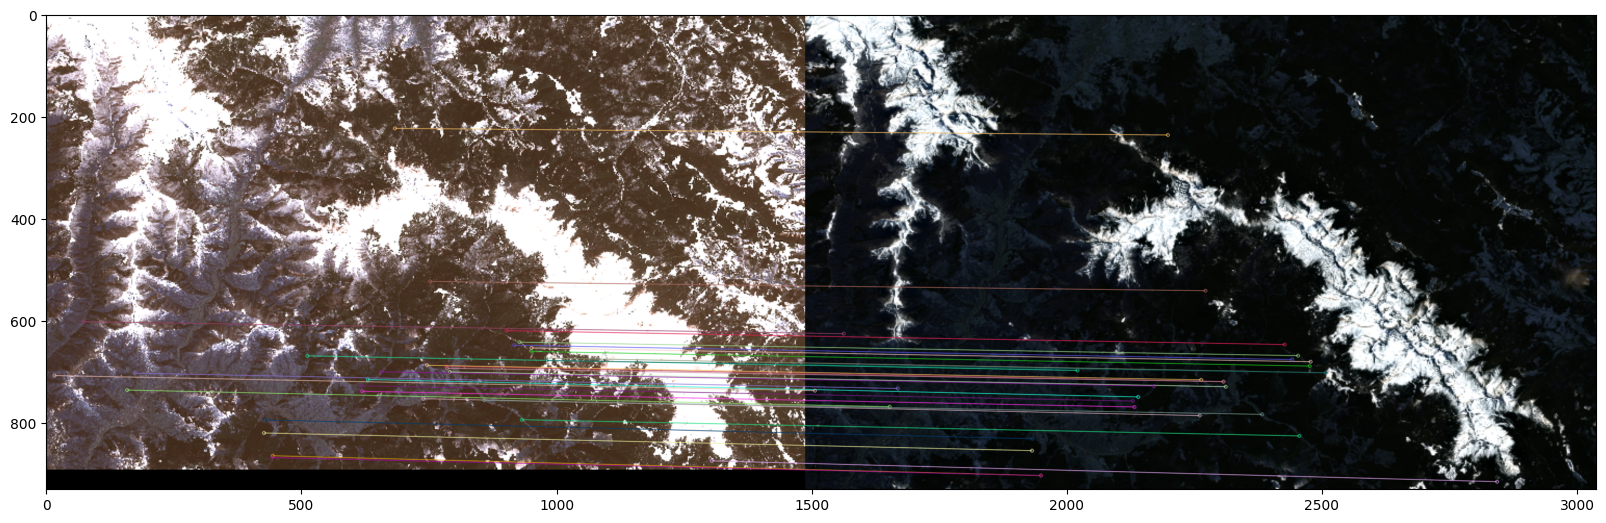

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Uploading key points and descriptors from .npz files
data1 = np.load('images/naturalimage.png.d2-net.npz')
keypoints1 = data1['keypoints']
descriptors1 = data1['descriptors']

data2 = np.load('images/image_3.png.d2-net.npz')
keypoints2 = data2['keypoints']
descriptors2 = data2['descriptors']

# Creating KeyPoint objects from uploading data
keypoints1 = [cv2.KeyPoint(x=float(kp[0]), y=float(kp[1]), size=kp[2]) for kp in keypoints1]
keypoints2 = [cv2.KeyPoint(x=float(kp[0]), y=float(kp[1]), size=kp[2]) for kp in keypoints2]

# Matching the descriptors with BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Using the Ratio Test to screen out good matches
# Here we can play with ratio value, to increase or decrease good matches count
good_matches = []
for m, n in matches:
    if m.distance < 0.83 * n.distance:
        good_matches.append([m])

# Uploading the original image
image1 = cv2.imread('images/naturalimage.png')
image2 = cv2.imread('images/image_3.png')


img3 = cv2.drawMatchesKnn(image1, keypoints1, image2, keypoints2, good_matches, None, flags=2)
plt.figure(figsize=(20, 10))
plt.imshow(img3)

plt.show()

In [2]:
from algorithm import *

# Загрузка изображений
image1 = cv2.imread('images/naturalimage.png')
image2 = cv2.imread('images/image_3.png')

sift_matcher = SIFTMatcher(ratio_thresh=0.75)
orb_matcher = ORBMatcher(number_of_points=500)
akaze_matcher = AKAZEMatcher()

sift_performance = measure_performance(sift_matcher, image1, image2)
orb_performance = measure_performance(orb_matcher, image1, image2)
akaze_performance = measure_performance(akaze_matcher, image1, image2)

print(f"SIFT: Matches - {sift_performance[0]}, Time - {sift_performance[1]:.2f} seconds")
print(f"ORB: Matches - {orb_performance[0]}, Time - {orb_performance[1]:.2f} seconds")
print(f"A-KAZE: Matches - {akaze_performance[0]}, Time - {akaze_performance[1]:.2f} seconds")

SIFT: Matches - 145, Time - 1.09 seconds
ORB: Matches - 142, Time - 0.15 seconds
A-KAZE: Matches - 2116, Time - 0.66 seconds


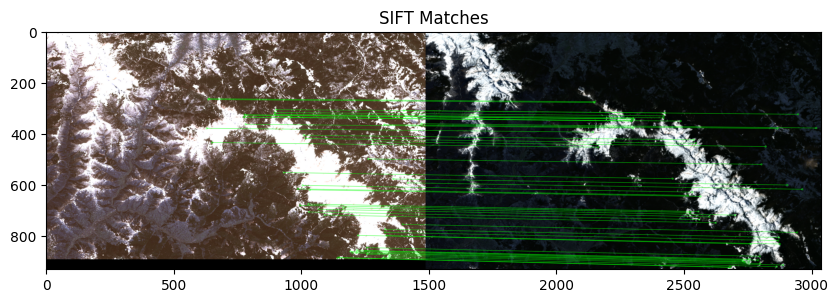

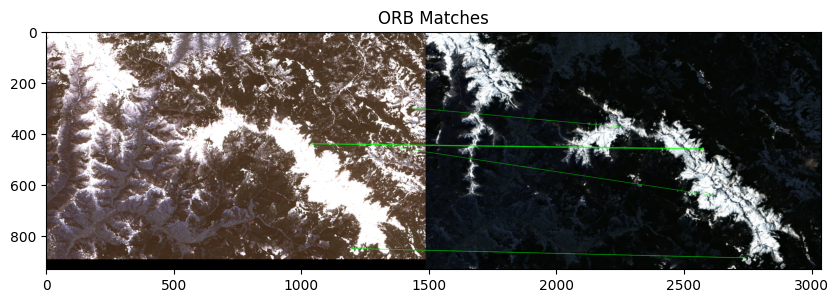

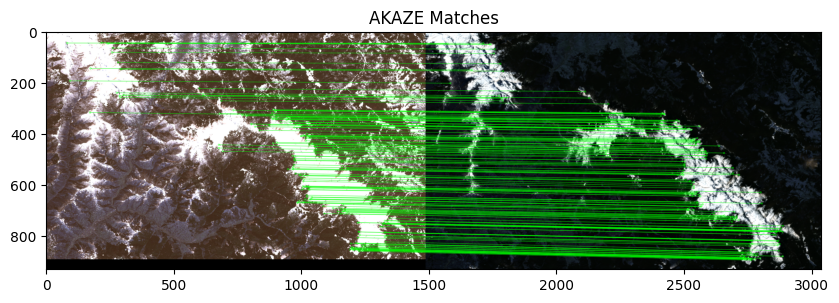

In [3]:
def draw_matches_ransac(image1, keypoints1, image2, keypoints2, matches, title='Matches'):
    ransac_filter = RANSACFilter()
    M, mask = ransac_filter.apply(keypoints1, keypoints2, matches)
    if M is not None:
        draw_params = dict(matchColor=(0, 255, 0),
                           singlePointColor=None,
                           matchesMask=mask.ravel().tolist(),
                           flags=2)
        img_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, **draw_params)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(img_matches)
        plt.title(title)
        plt.show()
        
siftkeypoints1, siftdescriptors1 = sift_matcher.find_keypoints_and_descriptors(image1)
siftkeypoints2, siftdescriptors2 = sift_matcher.find_keypoints_and_descriptors(image2)

orbkeypoints1, orbdescriptors1 = orb_matcher.find_keypoints_and_descriptors(image1)
orbkeypoints2, orbdescriptors2 = orb_matcher.find_keypoints_and_descriptors(image2)

akazekeypoints1, akazedescriptors1 = akaze_matcher.find_keypoints_and_descriptors(image1)
akazekeypoints2, akazedescriptors2 = akaze_matcher.find_keypoints_and_descriptors(image2)

good_matches_sift = sift_matcher.match(siftdescriptors1, siftdescriptors2)

good_matches_orb = orb_matcher.match(orbdescriptors1, orbdescriptors2)

good_matches_akaze = akaze_matcher.match(akazedescriptors1, akazedescriptors2)

draw_matches_ransac(image1, siftkeypoints1, image2, siftkeypoints2, good_matches_sift, 'SIFT Matches')
draw_matches_ransac(image1, orbkeypoints1, image2, orbkeypoints2, good_matches_orb, 'ORB Matches')
draw_matches_ransac(image1, akazekeypoints1, image2, akazekeypoints2, good_matches_akaze, 'AKAZE Matches')